In [29]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_sample_image
from matplotlib import pyplot as plt

# 1. A simple CNN example

In [30]:
# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

Populating the interactive namespace from numpy and matplotlib


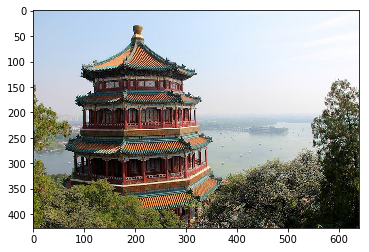

In [33]:
%pylab inline
plt.imshow(china)
# plt.imshow(flower)

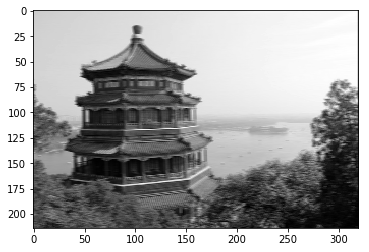

In [35]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

with tf.variable_scope("cnn"):
    # Create a graph with input X plus a convolutional layer applying the 2 filters
    X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

# 2. Pooling layer

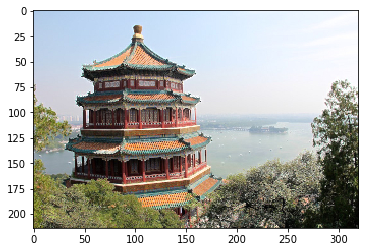

In [37]:
with tf.variable_scope("pooling"):
    # Create a graph with input X plus a max pooling layer
    X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    #max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()